In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
from scipy.stats import skew
import pylab as p 
import statsmodels.api as sm
from scipy.stats import norm


# Raw Csv data of Bangladeshi middle class

In [2]:

data = pd.read_csv(r'/Users/hridoy/Desktop/Research Analysis/final/Future of Bangladeshi Middle Class Families ordered - Sheet1.tsv', sep = "\t")

print(data)


              Timestamp                       Current state  \
0    5/16/2022 22:05:53        Middle Class (Income Range )   
1    5/16/2022 22:07:57        Middle Class (Income Range )   
2    5/16/2022 22:08:55        Middle Class (Income Range )   
3    5/16/2022 22:09:01  Lower Middle Class (Income Range )   
4    5/16/2022 22:11:21        Middle Class (Income Range )   
..                  ...                                 ...   
119  6/24/2022 18:34:04        Middle Class (Income Range )   
120  6/25/2022 15:38:06        Middle Class (Income Range )   
121  6/26/2022 10:03:40        Middle Class (Income Range )   
122  6/29/2022 14:15:11        Middle Class (Income Range )   
123  6/29/2022 23:26:18        Middle Class (Income Range )   

                   Two years back state  Income Expenditure  \
0          Middle Class (Income Range )  50,000      45,000   
1          Middle Class (Income Range )   30000       25000   
2          Middle Class (Income Range )   35000       

# Data Types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp             124 non-null    object
 1   Current state         124 non-null    object
 2   Two years back state  124 non-null    object
 3   Income                124 non-null    object
 4   Expenditure           124 non-null    object
 5   Loan                  124 non-null    object
 6   Living                124 non-null    object
 7   Address               124 non-null    object
 8   Investment            123 non-null    object
dtypes: object(9)
memory usage: 8.8+ KB


# Converting Income and Enpenditure Data in Float

In [5]:
data.replace(',','', regex=True, inplace=True)

In [6]:
data['Income'] = data['Income'].astype('float')
data['Expenditure'] = data['Expenditure'].astype('float')
data.dtypes

Timestamp                object
Current state            object
Two years back state     object
Income                  float64
Expenditure             float64
Loan                     object
Living                   object
Address                  object
Investment               object
dtype: object

# Some description of income and expenditure

In [7]:
data.describe()

,Income,Expenditure
count,124.000000,124.000000
mean,82838.709677,84403.225806
std,114940.167333,144210.264249
min,8000.000000,10000.000000
25%,35000.000000,30000.000000
50%,50000.000000,50000.000000
75%,80000.000000,60000.000000
max,700000.000000,1000000.000000


# Data Description of Income in Bangladeshi middle class

In [8]:
data['Income'].min()

8000.0

In [9]:
data['Income'].std()

114940.16733333131

In [10]:
data['Income'].max()

700000.0

In [11]:
data['Income'].mean()

82838.70967741935

In [12]:
data['Income'].mode()

0    50000.0
dtype: float64

In [13]:
data['Income'].median()

50000.0

In [20]:
data['Income'].quantile(.5)

50000.0

In [15]:
data['Income'].quantile(.25)

35000.0

In [16]:
data['Income'].quantile(.75)

80000.0

In [17]:
data['Income'].quantile(.1)

25000.0

In [22]:
data['Income'].quantile([.1, .25, .5, .75])

0.10    25000.0
0.25    35000.0
0.50    50000.0
0.75    80000.0
Name: Income, dtype: float64

# Data Description of Expenditure in Bangladeshi middle class 

In [24]:
data['Expenditure'].min()

10000.0

In [25]:
data['Expenditure'].std()

144210.26424881417

In [26]:
data['Expenditure'].max()

1000000.0

In [27]:
data['Expenditure'].mean()

84403.2258064516

In [29]:
data['Expenditure'].mode()

0    50000.0
dtype: float64

In [30]:
data['Expenditure'].median()

50000.0

In [31]:
data['Expenditure'].quantile(0.5)

50000.0

In [32]:
data['Expenditure'].quantile(0.25)

30000.0

In [33]:
data['Expenditure'].quantile(0.75)


60000.0

In [34]:
data['Expenditure'].quantile(0.1)

25000.0

# Skewness and Kurtosis

In [35]:
data['Income'].skew()

3.9518381563860756

In [36]:
data['Expenditure'].skew()

4.280916372761364

In [37]:
data['Income'].kurtosis()

16.715382992632076

In [38]:
data['Expenditure'].kurtosis()

19.847516912331464

# 

In [40]:
x = data['Income']
y = data['Expenditure']
x
y

0       45000.0
1       25000.0
2       35000.0
3      300000.0
4       80000.0
         ...   
119     60000.0
120     60000.0
121    700000.0
122     60000.0
123     25000.0
Name: Expenditure, Length: 124, dtype: float64

In [41]:
#scipy.stats.pearsonr(x, y)
x.corr(y)
y.corr(x)


0.8759055803895651

In [42]:
x.corr(y, method='spearman')
y.corr(x, method='spearman')

0.9069630004043256

In [43]:
x.corr(y, method='kendall')
y.corr(x, method='kendall')

0.798426554503312

In [44]:
data['Income'].value_counts()

50000.0     20
60000.0     13
40000.0     12
30000.0     11
100000.0     9
80000.0      8
70000.0      7
35000.0      7
20000.0      6
25000.0      4
45000.0      4
90000.0      3
300000.0     3
55000.0      2
200000.0     2
700000.0     2
150000.0     2
12000.0      2
15000.0      1
10000.0      1
120000.0     1
600000.0     1
8000.0       1
350000.0     1
500000.0     1
Name: Income, dtype: int64

In [39]:
pd.crosstab(index=data['Expenditure'], columns='count')

col_0,count
Expenditure,
10000.0,5
15000.0,3
18000.0,1
20000.0,2
22000.0,1
25000.0,11
30000.0,9
32000.0,1
35000.0,6


In [40]:
#data['Income'].value_counts()
#data.groupby(['Income']).count()

#data['Income'] = data['Income'].cumsum()

# CDF & PDF of Income

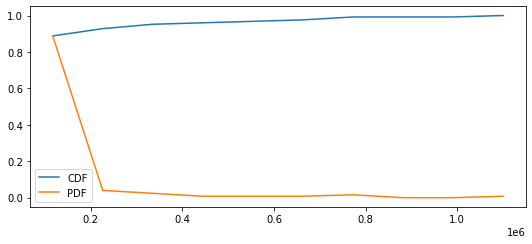

In [41]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

count, bins_count = np.histogram(x, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.plot(bins_count[1:], pdf, label="PDF")
plt.legend()
plt.show()

 # CDF & PDF of Expenditure

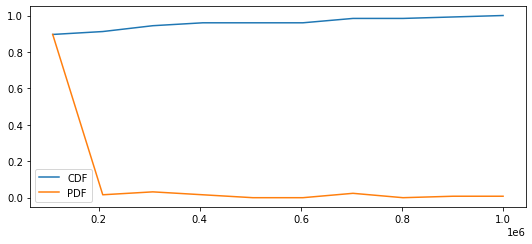

In [42]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

count, bins_count = np.histogram(y, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], cdf, label="CDF")
plt.plot(bins_count[1:], pdf, label="PDF")
plt.legend()
plt.show()

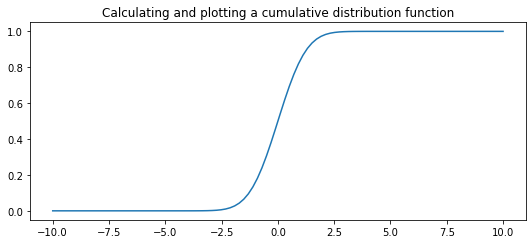

In [43]:
# x = np.linspace(-10,10,100)
# y = norm.cdf(x)

# plt.plot(x, y)

# plt.title('Calculating and plotting a cumulative distribution function')

# plt.savefig("cumulative_density_distribution_04.png", bbox_inches='tight')
# plt.show()


<AxesSubplot:xlabel='Income', ylabel='Expenditure'>

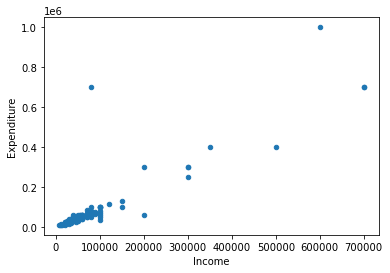

In [46]:
data.plot(kind='scatter', x='Income', y='Expenditure')

In [48]:
a = data['Income'].skew()
b = data['Expenditure'].skew()

print('\nSkewness for Income: ', a,'\n\nSkewness for Expenditure: ', b, '\n')


Skewness for Income:  3.9518381563860756 

Skewness for Expenditure:  4.280916372761364 



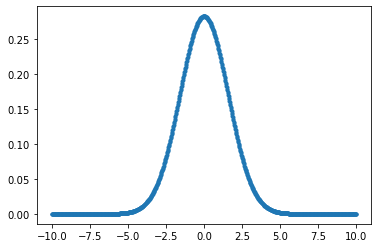

Skewness for the input data :  1.458658437437705


In [49]:
# x = np.linspace(-10, 10, 1000)
# y = 1/(np.sqrt(4*np.pi)) * np.exp( -0.2*(x)**2  )
  
# data['Expenditure']
# p.plot(x, y, '.')
# p.show()
  
# print('Skewness for the input data : ', skew(y))

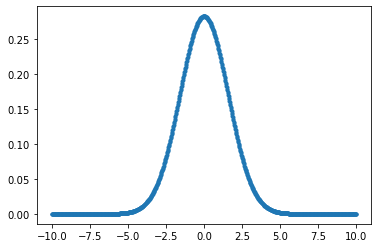

Skewness for the input data :  1.458658437437705


In [50]:
# x = np.linspace(-10, 10, 1000)
# y = 1/(np.sqrt(4*np.pi)) * np.exp( -0.2*(x)**2  )
  
# data['Income']
# p.plot(x, y, '.')
# p.show()
  
# print('Skewness for the input data : ', skew(y))